# Census Income Data Set(Dynamics Prjects M20 Number 6)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('cencus.csv',na_values=' ?')
data
# Extraction was done by Barry Becker from the 1994 Census database.
#A set of reasonably clean records was extracted using the following conditions-((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
#Prediction task is to determine whether a person makes over 50K a year.


,Age,workclass,fnlwgt,education,education number,status,occupation,relationship,race,gender,capital gain,capital loss,hrs per week,native country,annual income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df=pd.DataFrame(data=data)
df.head()

,Age,workclass,fnlwgt,education,education number,status,occupation,relationship,race,gender,capital gain,capital loss,hrs per week,native country,annual income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [4]:
df1=df.copy()

In [5]:
df1.info()
# 'workclass','occupation','native country' contains 'null' values
# Target -> Annual income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   workclass         30725 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education number  32561 non-null  int64 
 5   status            32561 non-null  object
 6   occupation        30718 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   gender            32561 non-null  object
 10  capital gain      32561 non-null  int64 
 11  capital loss      32561 non-null  int64 
 12  hrs per week      32561 non-null  int64 
 13  native country    31978 non-null  object
 14  annual income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df1['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
imp=SimpleImputer(strategy='most_frequent')
# will use 'most frequent' technique to fill the miss values since its object data attribute

In [8]:
df1['workclass']=imp.fit_transform(df1['workclass'].values.reshape(-1,1))

In [9]:
le=LabelEncoder()

In [10]:
df1['workclass']=le.fit_transform(df1['workclass'])
# converting object data into numerical data

In [11]:
le.classes_

array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [12]:
for i in df1['workclass'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

6=[' State-gov']
5=[' Self-emp-not-inc']
3=[' Private']
0=[' Federal-gov']
1=[' Local-gov']
4=[' Self-emp-inc']
7=[' Without-pay']
2=[' Never-worked']


In [13]:
df1['education']=le.fit_transform(df1['education'])
## converting object data into numerical data

In [14]:
for i in df1['education'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

9=[' Bachelors']
11=[' HS-grad']
1=[' 11th']
12=[' Masters']
6=[' 9th']
15=[' Some-college']
7=[' Assoc-acdm']
8=[' Assoc-voc']
5=[' 7th-8th']
10=[' Doctorate']
14=[' Prof-school']
4=[' 5th-6th']
0=[' 10th']
3=[' 1st-4th']
13=[' Preschool']
2=[' 12th']


In [15]:
df1['education number'].unique()
# this column seems to be same as clumn 'educatin after label encoding. so we can drop this column

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [16]:
df1['status']=le.fit_transform(df1['status'])
## converting object data into numerical data

In [17]:
for i in df1['status'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

4=[' Never-married']
2=[' Married-civ-spouse']
0=[' Divorced']
3=[' Married-spouse-absent']
5=[' Separated']
1=[' Married-AF-spouse']
6=[' Widowed']


In [18]:
df1['occupation']=imp.fit_transform(df1['occupation'].values.reshape(-1,1))
# will use 'most frequent' technique to fill the miss values since its object data attribute

In [19]:
df1['occupation']=le.fit_transform(df1['occupation'])
# converting object data into numerical data

In [20]:
df1['race']=le.fit_transform(df1['race'])

In [21]:
for i in df1['race'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i]))) 

4=[' White']
2=[' Black']
1=[' Asian-Pac-Islander']
0=[' Amer-Indian-Eskimo']
3=[' Other']


In [22]:
df1['gender']=le.fit_transform(df1['gender'])
# converting object data into numerical data

In [23]:
df1['native country']=imp.fit_transform(df1['native country'].values.reshape(-1,1))
# will use 'most frequent' technique to fill the miss values since its object data attribute

In [24]:
df1['native country']=le.fit_transform(df1['native country'])
# converting object data into numerical data

In [25]:
for i in df1['native country'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

38=[' United-States']
4=[' Cuba']
22=[' Jamaica']
18=[' India']
25=[' Mexico']
34=[' South']
32=[' Puerto-Rico']
15=[' Honduras']
8=[' England']
1=[' Canada']
10=[' Germany']
19=[' Iran']
29=[' Philippines']
21=[' Italy']
30=[' Poland']
3=[' Columbia']
0=[' Cambodia']
36=[' Thailand']
6=[' Ecuador']
24=[' Laos']
35=[' Taiwan']
13=[' Haiti']
31=[' Portugal']
5=[' Dominican-Republic']
7=[' El-Salvador']
9=[' France']
12=[' Guatemala']
2=[' China']
23=[' Japan']
40=[' Yugoslavia']
28=[' Peru']
27=[' Outlying-US(Guam-USVI-etc)']
33=[' Scotland']
37=[' Trinadad&Tobago']
11=[' Greece']
26=[' Nicaragua']
39=[' Vietnam']
16=[' Hong']
20=[' Ireland']
17=[' Hungary']
14=[' Holand-Netherlands']


In [26]:
df1['annual income']=le.fit_transform(df1['annual income'])
# converting object data into numerical data

In [27]:
for i in df1['annual income'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=[' <=50K']
1=[' >50K']


In [28]:
df1['relationship']=le.fit_transform(df1['relationship'])
# converting object data into numerical data

In [29]:
for i in df1['relationship'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=[' Not-in-family']
0=[' Husband']
5=[' Wife']
3=[' Own-child']
4=[' Unmarried']
2=[' Other-relative']


In [30]:
df2=df1.drop('education number',axis=1)
df2.head()
# dropping this column since we have already label encoded education column

,Age,workclass,fnlwgt,education,status,occupation,relationship,race,gender,capital gain,capital loss,hrs per week,native country,annual income
0,39,6,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,2,9,5,2,0,0,0,40,4,0


In [31]:
df2.columns

Index(['Age ', 'workclass', 'fnlwgt', 'education', 'status', 'occupation',
       'relationship', 'race', 'gender', 'capital gain', 'capital loss',
       'hrs per week', 'native country', 'annual income'],
      dtype='object')

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e1d9c688>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3dfc99488>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e1d9cfc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3dfa6c408>}

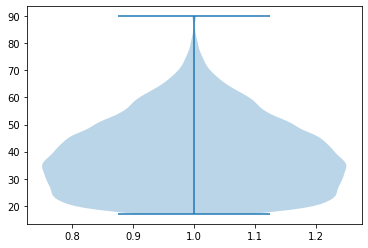

In [32]:
plt.violinplot(df2['Age '])
# most of the people belongs to 20-40 age group

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2b6dfc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e1db5b88>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2b75848>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2b75f88>}

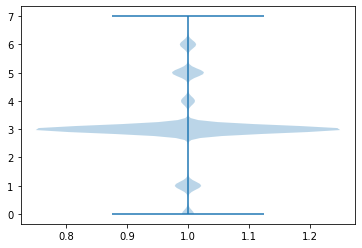

In [33]:
plt.violinplot(df2['workclass'])
# Most of the people belongs to 'private' sector job

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2bed688>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e2b3e8c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2bede88>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2bf4d48>}

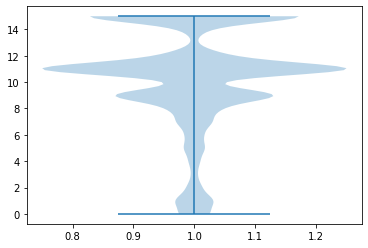

In [34]:
plt.violinplot(df2['education'])
# Most of the people are 'HS Grad'

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2c5e408>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e2bc0a88>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2c5ec48>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2c63b88>}

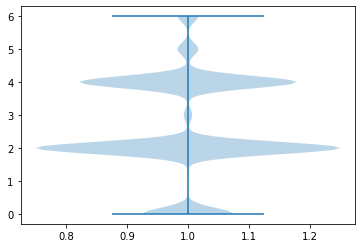

In [35]:
plt.violinplot(df2['status'])
# most of the people are ' Married-civ-spouse'

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2cca508>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e2c5e0c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2ccad08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2cd0bc8>}

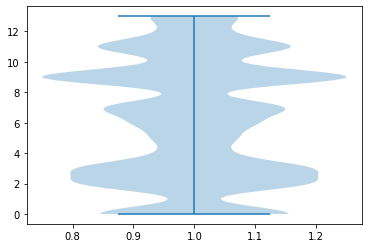

In [36]:
plt.violinplot(df2['occupation'])
# people from all occupation are present here. 

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2d32b88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e2cf8308>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2d3adc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2d3ad48>}

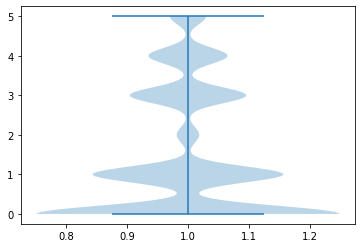

In [37]:
plt.violinplot(df2['relationship'])
# we can observe 'husband' is the earning member in ost of the cases

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2d9f788>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e2d32888>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2d9ffc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2da6f08>}

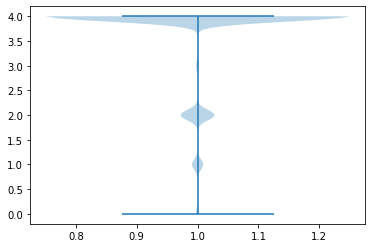

In [38]:
plt.violinplot(df2['race'])
# most people belongs 'white' race

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d3e2e0e5c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d3e2d69a88>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d3e2e0ee08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d3e2e16d48>}

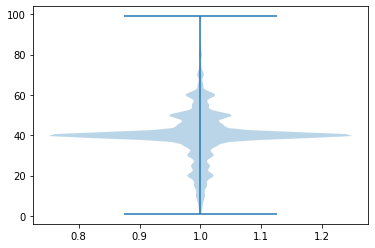

In [39]:
plt.violinplot(df2['hrs per week'])
# most of the people works 40 hrs a week

{'whiskers': [<matplotlib.lines.Line2D at 0x2d3e2e6a608>,
 'caps': [<matplotlib.lines.Line2D at 0x2d3e2e84d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d3e2e7f288>],
 'medians': [<matplotlib.lines.Line2D at 0x2d3e2e8bac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d3e2e8bbc8>],
 'means': []}

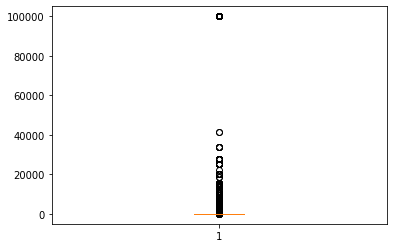

In [40]:
plt.boxplot(df2['capital gain'])
# this column highly skewed it seems 

{'whiskers': [<matplotlib.lines.Line2D at 0x2d3e2ee9f88>,
 'caps': [<matplotlib.lines.Line2D at 0x2d3e2eeef48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d3e2eab588>],
 'medians': [<matplotlib.lines.Line2D at 0x2d3e2ef3fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d3e2ef3f48>],
 'means': []}

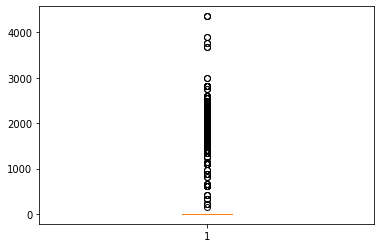

In [41]:
plt.boxplot(df2['capital loss'])
# this column highly skewed it seems 

# Bivariate Analysis

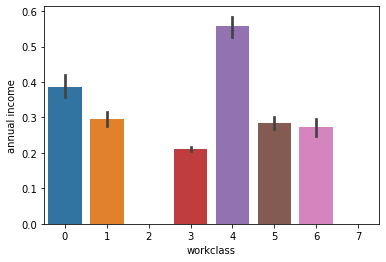

In [42]:
sns.barplot(x='workclass',y='annual income',data=df2)
# 'self-em-inc' peopl are earning most

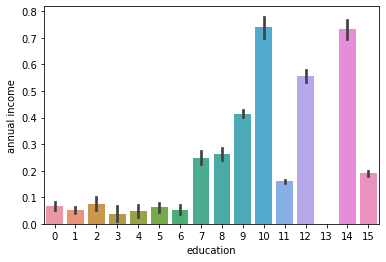

In [43]:
sns.barplot(x='education',y='annual income',data=df2)
#'doctorate' & 'prof=school' are earning most

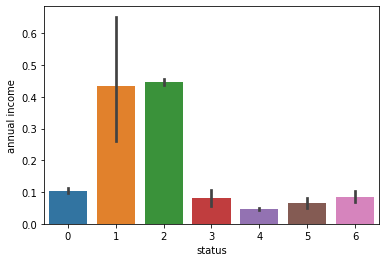

In [44]:
sns.barplot(x='status',y='annual income',data=df2)
# 'married-af-spouse' & 'married-civ-spouse' are earning most

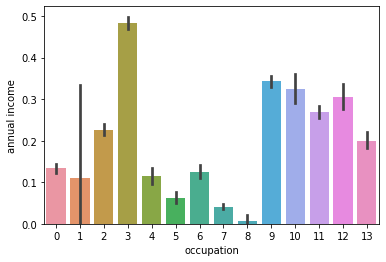

In [45]:
sns.barplot(x='occupation',y='annual income',data=df2)
# 'sales' people are earning most 

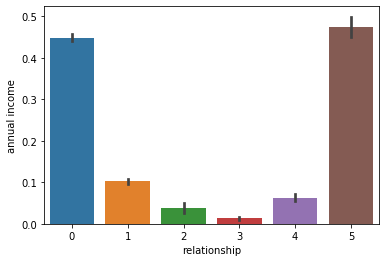

In [46]:
sns.barplot(x='relationship',y='annual income',data=df2)

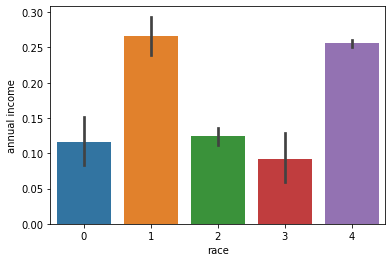

In [47]:
sns.barplot(x='race',y='annual income',data=df2)
# 'asian-pac-islands' people are more

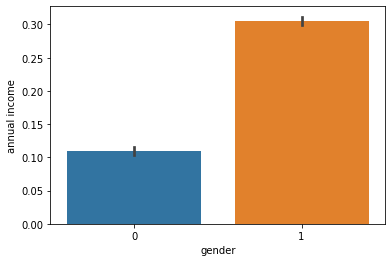

In [48]:
sns.barplot(x='gender',y='annual income',data=df2)
# 'male' earning more 

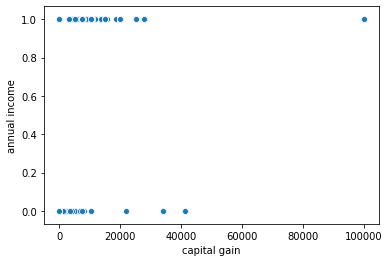

In [49]:
sns.scatterplot(data=df1,x='capital gain',y='annual income')


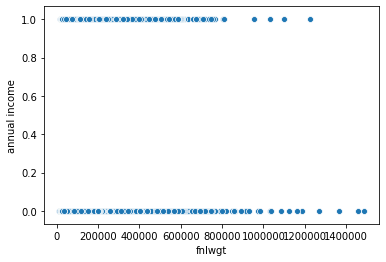

In [50]:
sns.scatterplot(data=df1,x='fnlwgt',y='annual income')

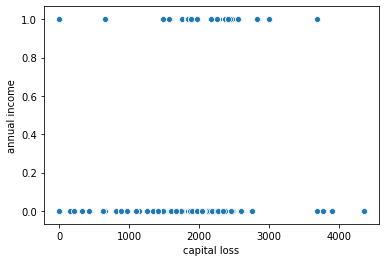

In [51]:
sns.scatterplot(data=df1,x='capital loss',y='annual income')

In [52]:
df2.describe()
# capital gain, capital loss, hrs per week, - all these numrical attributes - data is quite spread out
# capital gain, capital loss - seems to have outliers

,Age,workclass,fnlwgt,education,status,occupation,relationship,race,gender,capital gain,capital loss,hrs per week,native country,annual income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.298210,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,1.107194,1.055500e+05,3.870264,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [53]:
df2.skew()
# checking skewness

Age                0.558743
workclass          0.076469
fnlwgt             1.446980
education         -0.934042
status            -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
gender            -0.719293
capital gain      11.953848
capital loss       4.594629
hrs per week       0.227643
native country    -4.243158
annual income      1.212430
dtype: float64

# Cleaning The Dataset

In [54]:
z=np.abs(zscore(df2))
z

array([[0.03067056, 2.62429763, 1.06361075, ..., 0.03542945, 0.26136999,
        0.56319851],
       [0.83710898, 1.72109965, 1.008707  , ..., 2.22215312, 0.26136999,
        0.56319851],
       [0.04264203, 0.08529633, 0.2450785 , ..., 0.03542945, 0.26136999,
        0.56319851],
       ...,
       [1.42360965, 0.08529633, 0.35877741, ..., 0.03542945, 0.26136999,
        0.56319851],
       [1.21564337, 0.08529633, 0.11095988, ..., 1.65522476, 0.26136999,
        0.56319851],
       [0.98373415, 0.81790166, 0.92989258, ..., 0.03542945, 0.26136999,
        1.77557289]])

In [55]:
df2n=df2[(z<3).all(axis=1)]
df2n.shape

(27918, 14)

In [56]:
df2n.describe()

,Age,workclass,fnlwgt,education,status,occupation,relationship,race,gender,capital gain,capital loss,hrs per week,native country,annual income
count,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000,27918.000000
mean,38.192994,3.084927,186505.103267,10.310337,2.616520,6.104055,1.465506,3.790852,0.663515,569.723261,1.206247,39.915789,37.504836,0.223154
std,13.412258,1.099480,94731.927326,3.893803,1.518574,3.990535,1.604524,0.605812,0.472516,2330.183001,32.500899,11.155688,2.523940,0.416368
min,17.000000,0.000000,18827.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,19.000000,0.000000
25%,27.000000,3.000000,118551.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,178995.500000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,235386.500000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,6.000000,505980.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,40.000000,1.000000


In [57]:
df2n.skew()
# we can still observe the skewness in capital loss & capital gain

Age                0.483033
workclass          0.083327
fnlwgt             0.626841
education         -0.943055
status            -0.043885
occupation         0.014259
relationship       0.756144
race              -2.584181
gender            -0.692152
capital gain       4.942084
capital loss      29.593350
hrs per week      -0.357395
native country    -5.167475
annual income      1.329912
dtype: float64

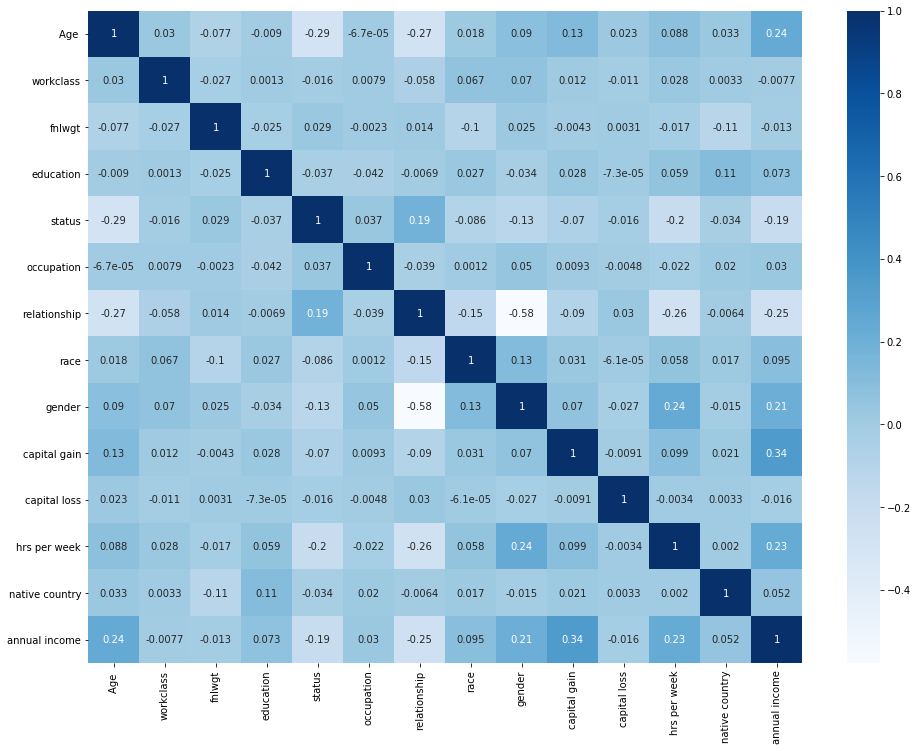

In [58]:
plt.figure(figsize=(16,12))
sns.heatmap(df2n.corr(),cmap='Blues',annot=True)
# most of the columns are in +ve relation with Target 


# Data preprocessing and model training 

In [59]:
x=df2n.iloc[:,0:-1]
# feature attributes

In [60]:
y=df2n.iloc[:,-1]
# target attribute

In [61]:
scale=StandardScaler()
# regularising the feuture columns to avoid underfitting and over fitting

In [62]:
x=scale.fit_transform(x)

In [63]:
# Since the target is binary, we can use logistic regression to train the model
# lets optimise the seed value to get the highest possible accuracy score 
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)


accuracy score correspondng to random state 41 is: 0.8129178605539638
accuracy score correspondng to random state 42 is: 0.8055157593123209
accuracy score correspondng to random state 43 is: 0.8076647564469914
accuracy score correspondng to random state 44 is: 0.8050382043935053
accuracy score correspondng to random state 45 is: 0.8067096466093601
accuracy score correspondng to random state 46 is: 0.8061127029608405
accuracy score correspondng to random state 47 is: 0.8067096466093601
accuracy score correspondng to random state 48 is: 0.816738299904489
accuracy score correspondng to random state 49 is: 0.8080229226361032
accuracy score correspondng to random state 50 is: 0.805396370582617
accuracy score correspondng to random state 51 is: 0.8085004775549188
accuracy score correspondng to random state 52 is: 0.8088586437440306
accuracy score correspondng to random state 53 is: 0.8076647564469914
accuracy score correspondng to random state 54 is: 0.8049188156638013
accuracy score corresp

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.3)
# Here we use seed value (random state) of 48 to train the model

In [102]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.811007640878701
[[5733  857]
 [ 726 1060]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6590
           1       0.55      0.59      0.57      1786

    accuracy                           0.81      8376
   macro avg       0.72      0.73      0.73      8376
weighted avg       0.82      0.81      0.81      8376

[0 0 0 ... 0 1 0]
AxesSubplot(0.125,0.125;0.62x0.755)


Cross_val_score is:
 0.8065405126387782


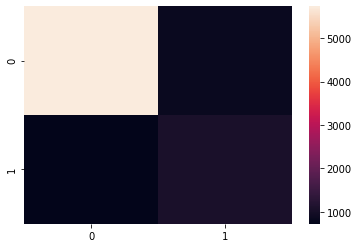

In [103]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print(sns.heatmap(matrix))
print('\n')
cvs=cross_val_score(lg,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [67]:
# AUC-ROC curve to represent logistic regression grapgically 

In [68]:
y_pred_prob=lg.predict_proba(x_test)[:,-1]
y_pred_prob

array([0.09825449, 0.10546443, 0.00781039, ..., 0.01353222, 0.87855359,
       0.14263935])

In [69]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

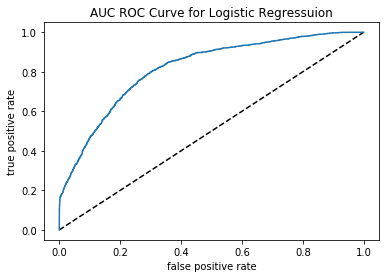

In [70]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for Logistic Regressuion')
plt.show()

In [71]:
# score is not good enough. lets try other algorithms to get better score 

In [72]:
# lets try DecisionTreeClassifier to train the model

In [73]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.8093708855819495
{'criterion': 'entropy'}


In [99]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.811007640878701
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6590
           1       0.55      0.59      0.57      1786

    accuracy                           0.81      8376
   macro avg       0.72      0.73      0.73      8376
weighted avg       0.82      0.81      0.81      8376

[[5733  857]
 [ 726 1060]]
Cross_val_score is:
 0.8081166491880274


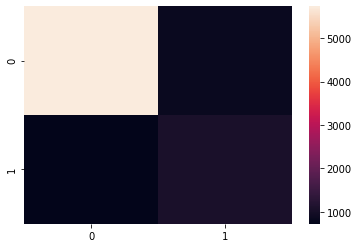

In [100]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [76]:
y_pred_prob=dtc.predict_proba(x_test)[:,-1]
y_pred_prob

array([0., 0., 0., ..., 0., 1., 1.])

In [77]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

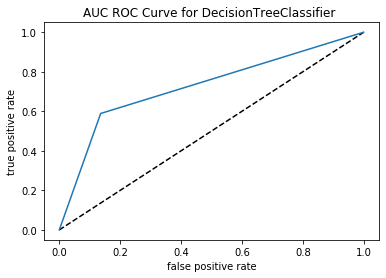

In [78]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for DecisionTreeClassifier ')
plt.show()

In [79]:
# lets try KNeighboursClassifier to train the model

In [80]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.8347659980897804
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6590
           1       0.62      0.56      0.59      1786

    accuracy                           0.83      8376
   macro avg       0.75      0.74      0.74      8376
weighted avg       0.83      0.83      0.83      8376

[[5986  604]
 [ 780 1006]]
Cross_val_score is:
 0.8315070319538772


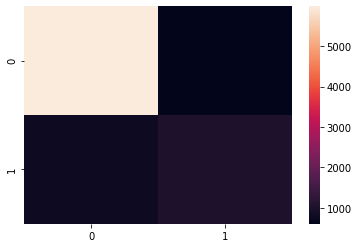

In [81]:
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(knn,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [82]:
y_pred_prob=knn.predict_proba(x_test)[:,-1]
y_pred_prob

array([0. , 0.6, 0. , ..., 0. , 1. , 0.2])

In [83]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

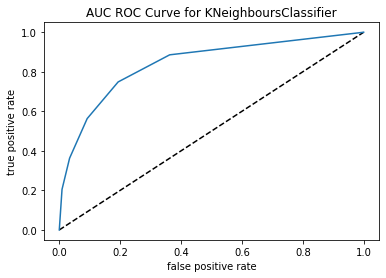

In [84]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for KNeighboursClassifier')
plt.show()

In [85]:
# lets try GaussianNB to train the model

In [86]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

0.7876074498567335
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      6590
           1       0.50      0.74      0.60      1786

    accuracy                           0.79      8376
   macro avg       0.71      0.77      0.73      8376
weighted avg       0.83      0.79      0.80      8376

[[5279 1311]
 [ 468 1318]]
Cross_val_score is:
 0.7759870813904339


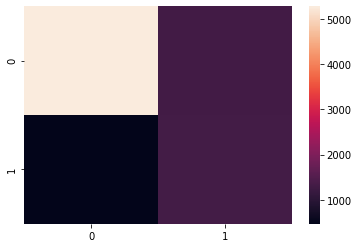

In [87]:
pred=gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(gb,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [88]:
y_pred_prob=gb.predict_proba(x_test)[:,-1]
y_pred_prob

array([1.75331989e-06, 4.90609061e-03, 3.65756867e-06, ...,
       1.01983511e-05, 1.00000000e+00, 8.05866332e-02])

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

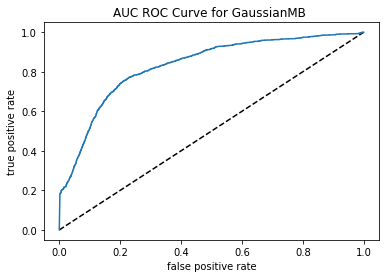

In [90]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for GaussianMB ') 
plt.show()

In [91]:
# since the score is still not good enough, we may try to boost the score ensemble techniques

In [92]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
# we can ovserve the score perfect and hence the model has learbned well enough

1.0

In [94]:
y_pred_prob=rf.predict_proba(x_test)[:,-1]
y_pred_prob

array([0.04, 0.13, 0.  , ..., 0.  , 0.98, 0.18])

In [95]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

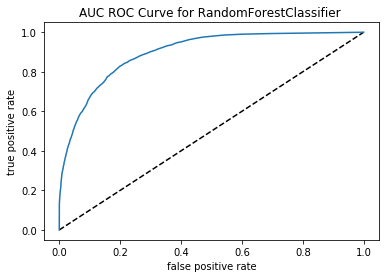

In [96]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve for RandomForestClassifier ') 
plt.show()

In [97]:
predrf

array([0, 0, 0, ..., 0, 1, 0])

# Save the Model 

In [98]:
joblib.dump(rf,'rfcensus.obj')

['rfcensus.obj']